In [18]:
# Kernel Python (Pyodide)
#import and patch libraries for web use
import pyodide_http
pyodide_http.patch_all

# packages with micropip
import micropip
await micropip.install("openpyxl")

#import pandas
import pandas as pd
#matplotlib library for plotting
import matplotlib.pyplot as plt
#the statsmodels libraty for statistical modeling
import statsmodels.api as sm

# file with data
excel_file = pd.ExcelFile("techgear_sales_data.xlsx", engine='openpyxl')

data = pd.read_excel(excel_file)

# (Q1) DATA EXPLORATION AND SUMMARY
#print the DataFrame to display the data
print(f'{data.head()}\n')

num_row = len(data)
print(f'Number of rows: {num_row}')
num_col = len(data.columns)
print(f'Number of columns: {num_col}\n')
average_spent_facebook = data['Ad_Spend_Facebook'].mean()
average_spent_instagram = data['Ad_Spend_Instagram'].mean()
average_discount = data['Discount_Rate'].mean()
print(f'The average amount spent on advertising for Facebook platform: ${average_spent_facebook:.2f}')
print(f'The average amount spent on advertising for Instagram platform: ${average_spent_instagram:.2f}')
print(f'The average discount provided to customers: {average_discount:.2f}%')

        Date  Sales  Ad_Spend_Facebook  Ad_Spend_Instagram  Discount_Rate
0 2020-01-31   4283                340                 146             10
1 2020-02-29   4775                284                 200              6
2 2020-03-31   5437                290                 240             10
3 2020-04-30   4541                269                 193             10
4 2020-05-31   3161                218                 182             16

Number of rows: 60
Number of columns: 5

The average amount spent on advertising for Facebook platform: $297.27
The average amount spent on advertising for Instagram platform: $192.53
The average discount provided to customers: 12.38%


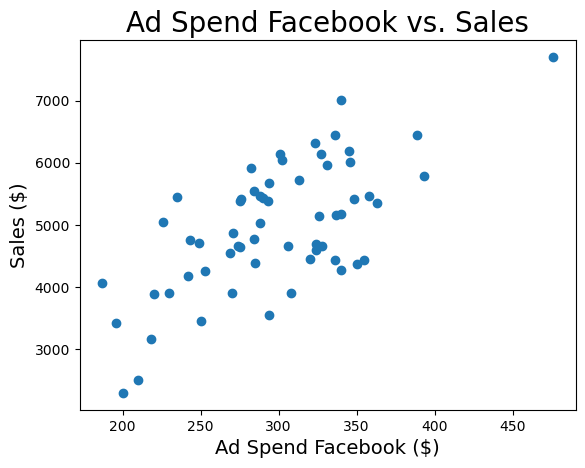

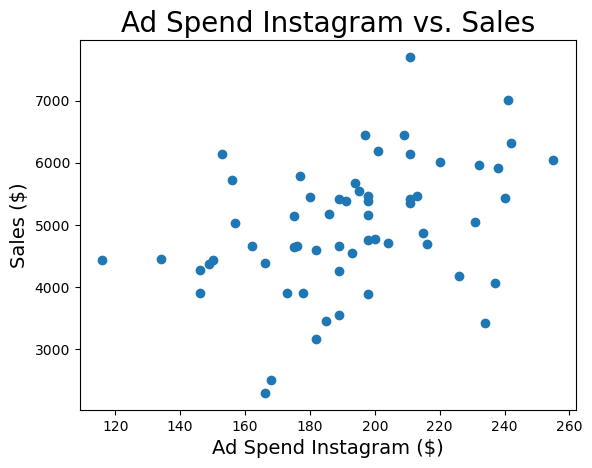

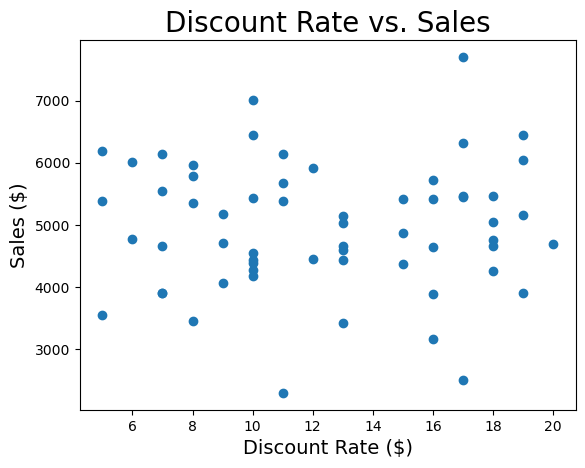

In [22]:
# (Q2) VISUALIZING RELATIONSHIPS

# A scatter plot with Ad_Spend_Facebook on the x-axis and Sales on the y-axis
plt.scatter(data['Ad_Spend_Facebook'], data['Sales'])
# Label the x-axis as "Ad Spend Facebook"
plt.xlabel('Ad Spend Facebook ($)', fontsize='14')
# Label the y-axis as "Sales ($)"
plt.ylabel('Sales ($)', fontsize='14')
# Set the title of the plot to 'Ad Spend Facebook vs. Sales'
plt.title('Ad Spend Facebook vs. Sales', fontsize='20')
# Display the plot
plt.show()

# A scatter plot with Ad_Spend_Instagram on the x-axis and Sales on the y-axis
plt.scatter(data['Ad_Spend_Instagram'], data['Sales'])
# Label the x-axis as "Ad Spend Instagram"
plt.xlabel('Ad Spend Instagram ($)', fontsize='14')
# Label the y-axis as "Sales ($)"
plt.ylabel('Sales ($)', fontsize='14')
# Set the title of the plot to 'Ad Spend Instagram vs. Sales'
plt.title('Ad Spend Instagram vs. Sales', fontsize='20')
# Display the plot
plt.show()

# A scatter plot with Discount Rate on the x-axis and Sales on the y-axis
plt.scatter(data['Discount_Rate'], data['Sales'])
# Label the x-axis as "Discount Rate"
plt.xlabel('Discount Rate ($)', fontsize='14')
# Label the y-axis as "Sales ($)"
plt.ylabel('Sales ($)', fontsize='14')
# Set the title of the plot to 'Discount Rate vs. Sales'
plt.title('Discount Rate vs. Sales', fontsize='20')
# Display the plot
plt.show()

In [23]:
# (Q3) SIMPLE LINEAR REGRESSION

#define the response (Y) and explanatory (X) variables
x = data['Ad_Spend_Facebook']
y = data['Sales']

#add a constant to the explanatory variable
x = sm.add_constant(x)

#build the linear regression model using the Ordinary Least Squares (OLS) method.
model = sm.OLS(y, x).fit()

#print the coefficients of the model and R-squared output
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     47.61
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           4.32e-09
Time:                        14:40:39   Log-Likelihood:                -482.94
No. Observations:                  60   AIC:                             969.9
Df Residuals:                      58   BIC:                             974.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1141.2817    563.05

0    -1231.847151
1      -19.495190
2      565.324242
3      -60.543772
4     -784.508951
5      721.412233
6      996.583626
7     1148.231665
8     -703.407200
9     -192.754574
10     -29.724340
11    -718.032305
12     437.726660
13    -798.578593
14    -191.759161
15     755.870531
16     611.835710
17    -192.870086
18   -1377.129469
19   -1272.481429
20     988.606561
21   -1272.798569
22    1011.963108
23     366.724785
24     469.733959
25     -74.235807
26    -894.138643
27     416.972282
28     527.257313
29     786.377411
30   -1190.217459
31    1282.812775
32     246.729372
33    -131.728927
34    1013.831123
35    -449.705992
36     492.905352
37    -239.513538
38    -288.388852
39     620.051098
40    1487.152849
41     759.504810
42    -406.608828
43   -1414.967250
44   -1332.601528
45    -704.486016
46     710.275660
47      -7.860912
48    1122.826536
49     570.923700
50    -409.490603
51    -422.358618
52    -308.256867
53   -1023.393439
54     185.051098
55     554

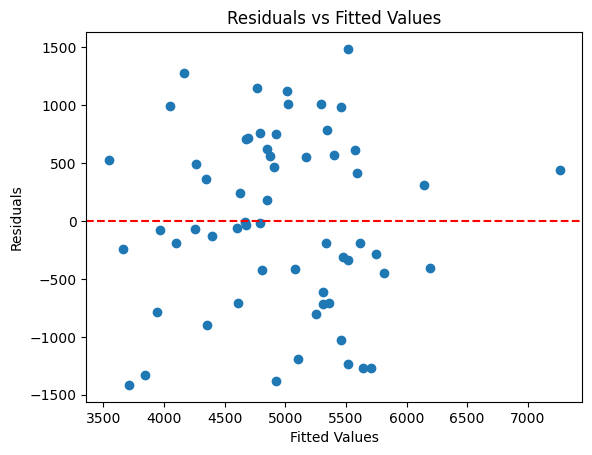

In [24]:
# (Q4) ASSESSING MODEL FIT
# obtain the residual from the model
# residual - difference between the observed value and the predicted value
residuals = model.resid

# print the residual
print(residuals)

# extract the fitted values (predicted values)
fitted_values = model.fittedvalues

# Create Residual vs. Fitted Values plot
# Create a scatter plot of the fitted values against the residuals
plt.scatter (fitted_values, residuals)
# Add a horizontal reference line at y=0 (red dashes line)
plt.axhline (y=0, color='r', linestyle='--')
# Label the x-axis as 'Fitted Values'
plt.xlabel('Fitted Values')
# Label the y-axis as 'Residuals'
plt.ylabel('Residuals')
# Add a title to the plot
plt.title('Residuals vs Fitted Values')
plt.show()

Average Root Mean Squared Error from 5-fold Cross-Validation: 626
Average RMSE from Decision Tree: 911
Relationship between the Variables


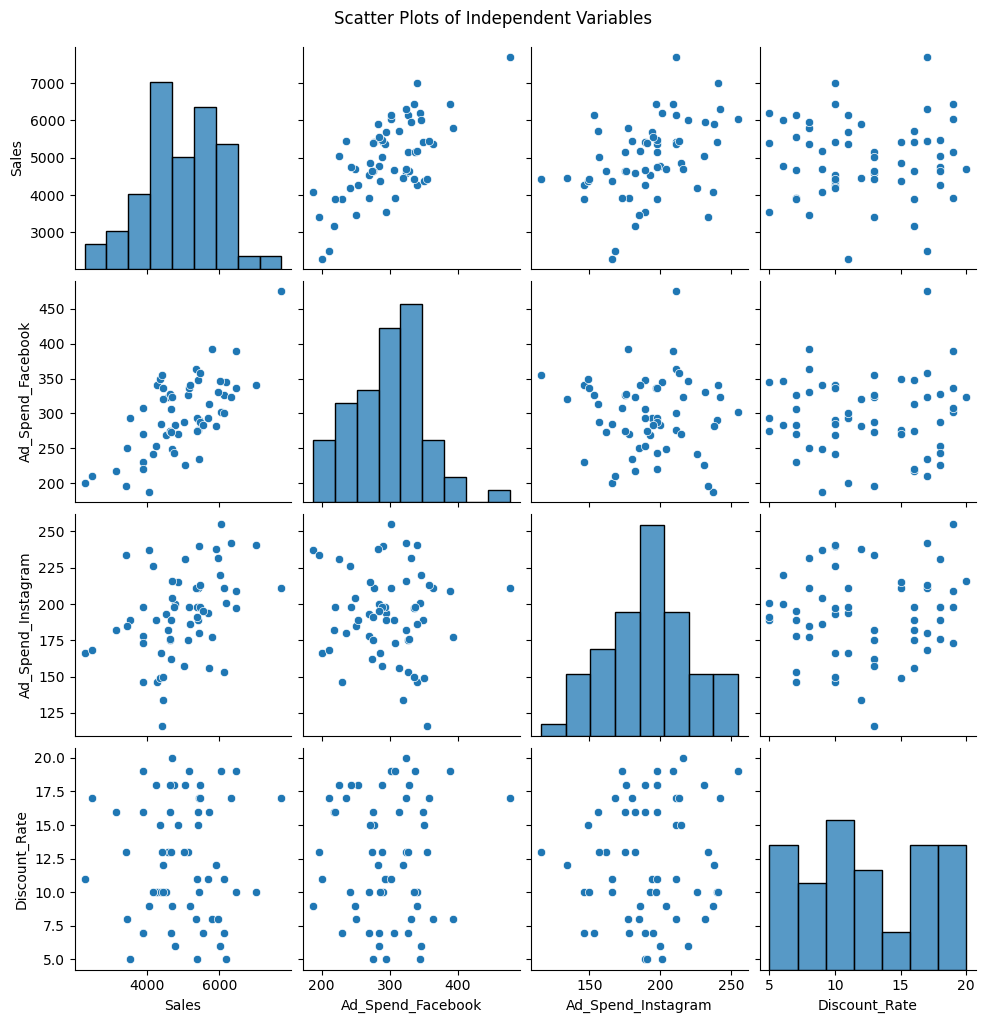

In [28]:
# (Q5) MULTIPLE LINEAR REGRESSION MODEL

# Build a multiple linear regression model using k-fold cross-validation and 
# use RMSF as the assessment measure.
# Import the cross_val_score function for performing cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.tree import DecisionTreeRegressor
#install and import the seaborn library for data visualization
await micropip.install('seaborn')
import seaborn as sns

# select the features and target variable
features = ['Ad_Spend_Facebook', 'Ad_Spend_Instagram', 'Discount_Rate']
target = 'Sales'
# prepare the future matrix (x) and target vector (y)
x = data[features]
y = data[target]

# initialize the model
model = LinearRegression()
# set a random seed for reproducibility
# shuffling process arranges the data in the same way every time
np.random.seed(42)
# preform 5-fold cross-validation
mse_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
# calculate the RMSE across all folds
rmse_scores = (-mse_scores) ** 0.5
average_rmse = rmse_scores.mean()
# print the average RMSE
print(f"Average Root Mean Squared Error from 5-fold Cross-Validation: {average_rmse:.0f}")

# Initialize the model
tree_model = DecisionTreeRegressor()

# Cross-validation: 5 folds
tree_mse_scores =  cross_val_score(tree_model, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert MSE to RMSE
tree_rmse_scores = (-tree_mse_scores) ** 0.5

# compute average RMSE for both models
tree_avg_rmse = tree_rmse_scores.mean()

# Print results
print(f'Average RMSE from Decision Tree: {tree_avg_rmse:.0f}')

print("Relationship between the Variables")

# Create scatterplots to visualize relationships between the variables
sns.pairplot(data[['Sales','Ad_Spend_Facebook', 'Ad_Spend_Instagram', 'Discount_Rate']])
# Add a title to the scatterplot matrix
plt.suptitle('Scatter Plots of Independent Variables', y=1.02)

# Displat the Scatter plot matrix
plt.show()

In [ ]:
# (Q6) FORECASTING
# file with data
excel_file_monthly = pd.ExcelFile("techgear_sales_data_monthly.xlsx", engine='openpyxl')

data_monthly = pd.read_excel(excel_file_monthly)
data_monthly.head()

